# AIPI 590 - XAI | Assignment #04

### Osama Ahmed


![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)
[![View notebooks on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/osama-shawir/Interpretable-ML-Models-II/blob/main/interpretable%20ml%20II.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/osama-shawir/Interpretable-ML-Models-II/blob/main/interpretable%20ml%20II.ipynb)  

This project involves the implementation of three interpretable machine learning models from the imodels library. The models are:

1. RuleFit
2. OneR
3. Decision Tree Classifier

##### We start by importing the necessary libraries and loading the dataset and building some helper functions that we will use to visualize the interpretability of the models.


In [32]:
# Import necessary libraries
!pip install imodels
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from imodels import OneRClassifier, RuleFitClassifier, DecisionTreeClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to replace Xnumbers with feature names in rules
def replace_feature_names(rule, feature_names):
    for i, name in enumerate(feature_names):
        rule = rule.replace(f'X{i}', name)
    return rule

# Function to plot feature importances
def plot_feature_importances(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_
    else:
        importances = [0] * X.shape[1]
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(X.shape[1]), importances, align='center')
    plt.xticks(range(X.shape[1]), feature_names, rotation=90)
    plt.title(f'Feature Importances for {model_name}')
    plt.show()

### RuleFit

RuleFit is a model that combines decision trees with linear models to create a more interpretable model. It trains a decision tree on the data and then fits a linear model to the leaf nodes of the tree. The linear model is used to predict the target variable. The model can be used to generate rules that can be used to explain the predictions of the model.

                                                 rule      coef   support
15                                      mean texture5  3.228150  1.000000
21                                    mean perimeter1 -0.037454  1.000000
24                                    mean perimeter4 -2.059866  1.000000
51  mean perimeter2 <= 117.45 and mean perimeter7 ...  0.010185  0.670854
44  mean perimeter2 <= 127.2 and mean perimeter7 <...  0.013785  0.650754
55  mean texture0 <= 0.62555 and mean perimeter3 <...  1.385924  0.625628
42  mean perimeter2 <= 127.65 and mean perimeter7 ...  0.069355  0.613065
50  mean texture0 <= 0.56195 and mean texture4 > 0...  1.180342  0.608040
47  mean texture3 <= 35.68 and mean perimeter7 <= ...  0.124652  0.608040
56  mean texture3 <= 42.32 and mean perimeter3 <= ...  0.112673  0.605528
43  mean texture3 <= 35.855 and mean perimeter7 <=...  0.296733  0.600503
45  mean texture0 <= 0.62555 and mean perimeter3 <...  1.175690  0.587940
53  mean texture <= 22.455 and mean pe

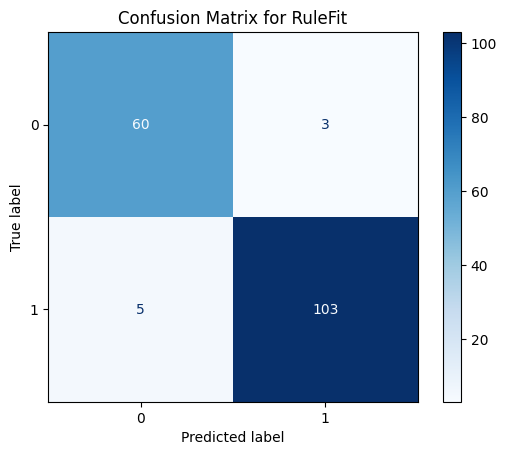

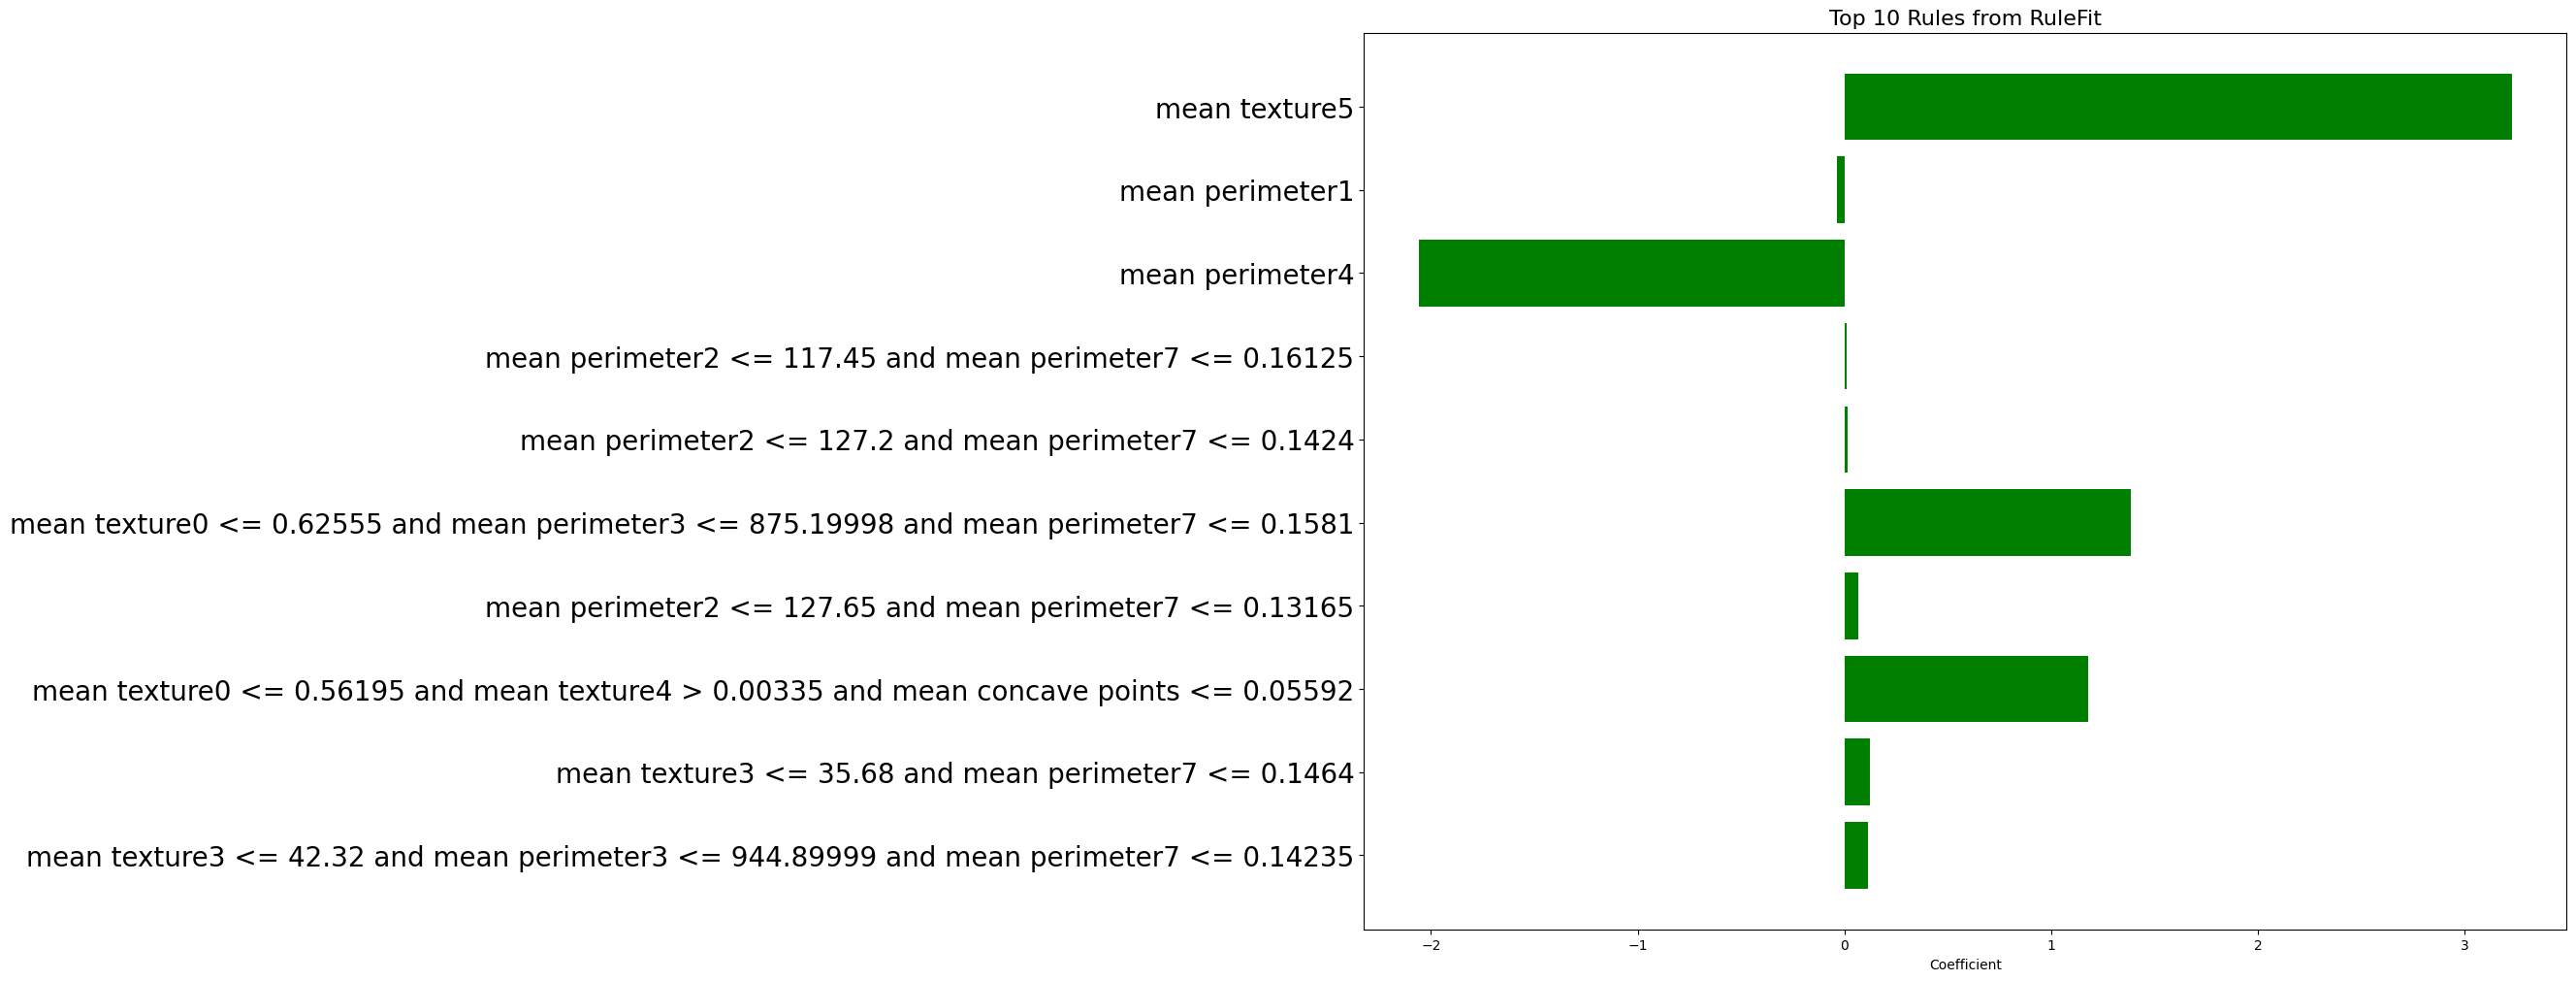

In [43]:
# RuleFit Classifier
rulefit = RuleFitClassifier()
rulefit.fit(X_train, y_train)
y_pred_rulefit = rulefit.predict(X_test)

# Print the rule coefficients and support
rules = rulefit._get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

# Apply the function to the rules
rules['rule'] = rules['rule'].apply(replace_feature_names, feature_names=feature_names)
print(rules[['rule', 'coef', 'support']])

# Visualize the confusion matrix
print(f"RuleFit Accuracy: {accuracy_score(y_test, y_pred_rulefit):.2f}")
ConfusionMatrixDisplay.from_estimator(rulefit, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for RuleFit')
plt.show()

# Visualize the top 10 rules with their coefficients and support
plt.figure(figsize=(16, 12))  # Adjust the figure size here
top_rules = rules.head(10)
plt.barh(top_rules['rule'], top_rules['coef'], color='green')
plt.xlabel('Coefficient')
plt.title('Top 10 Rules from RuleFit', fontsize=16)
plt.yticks(fontsize=20)
plt.gca().invert_yaxis()
plt.show()

### Decision Tree Classifier

A decision tree is a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. One major advantage of decision trees is that they are easy to interpret and understand, and we can visualize the tree to see how the model is making decisions.

DecisionTree Accuracy: 0.93


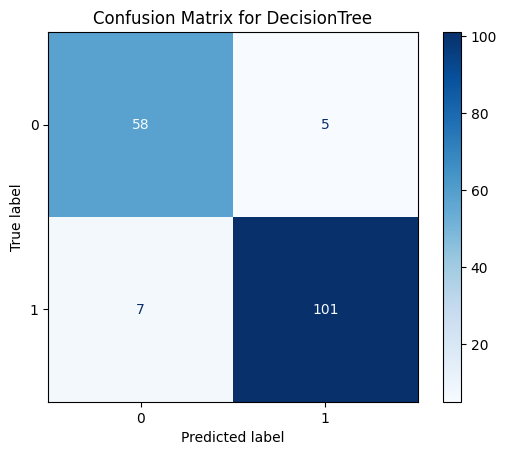

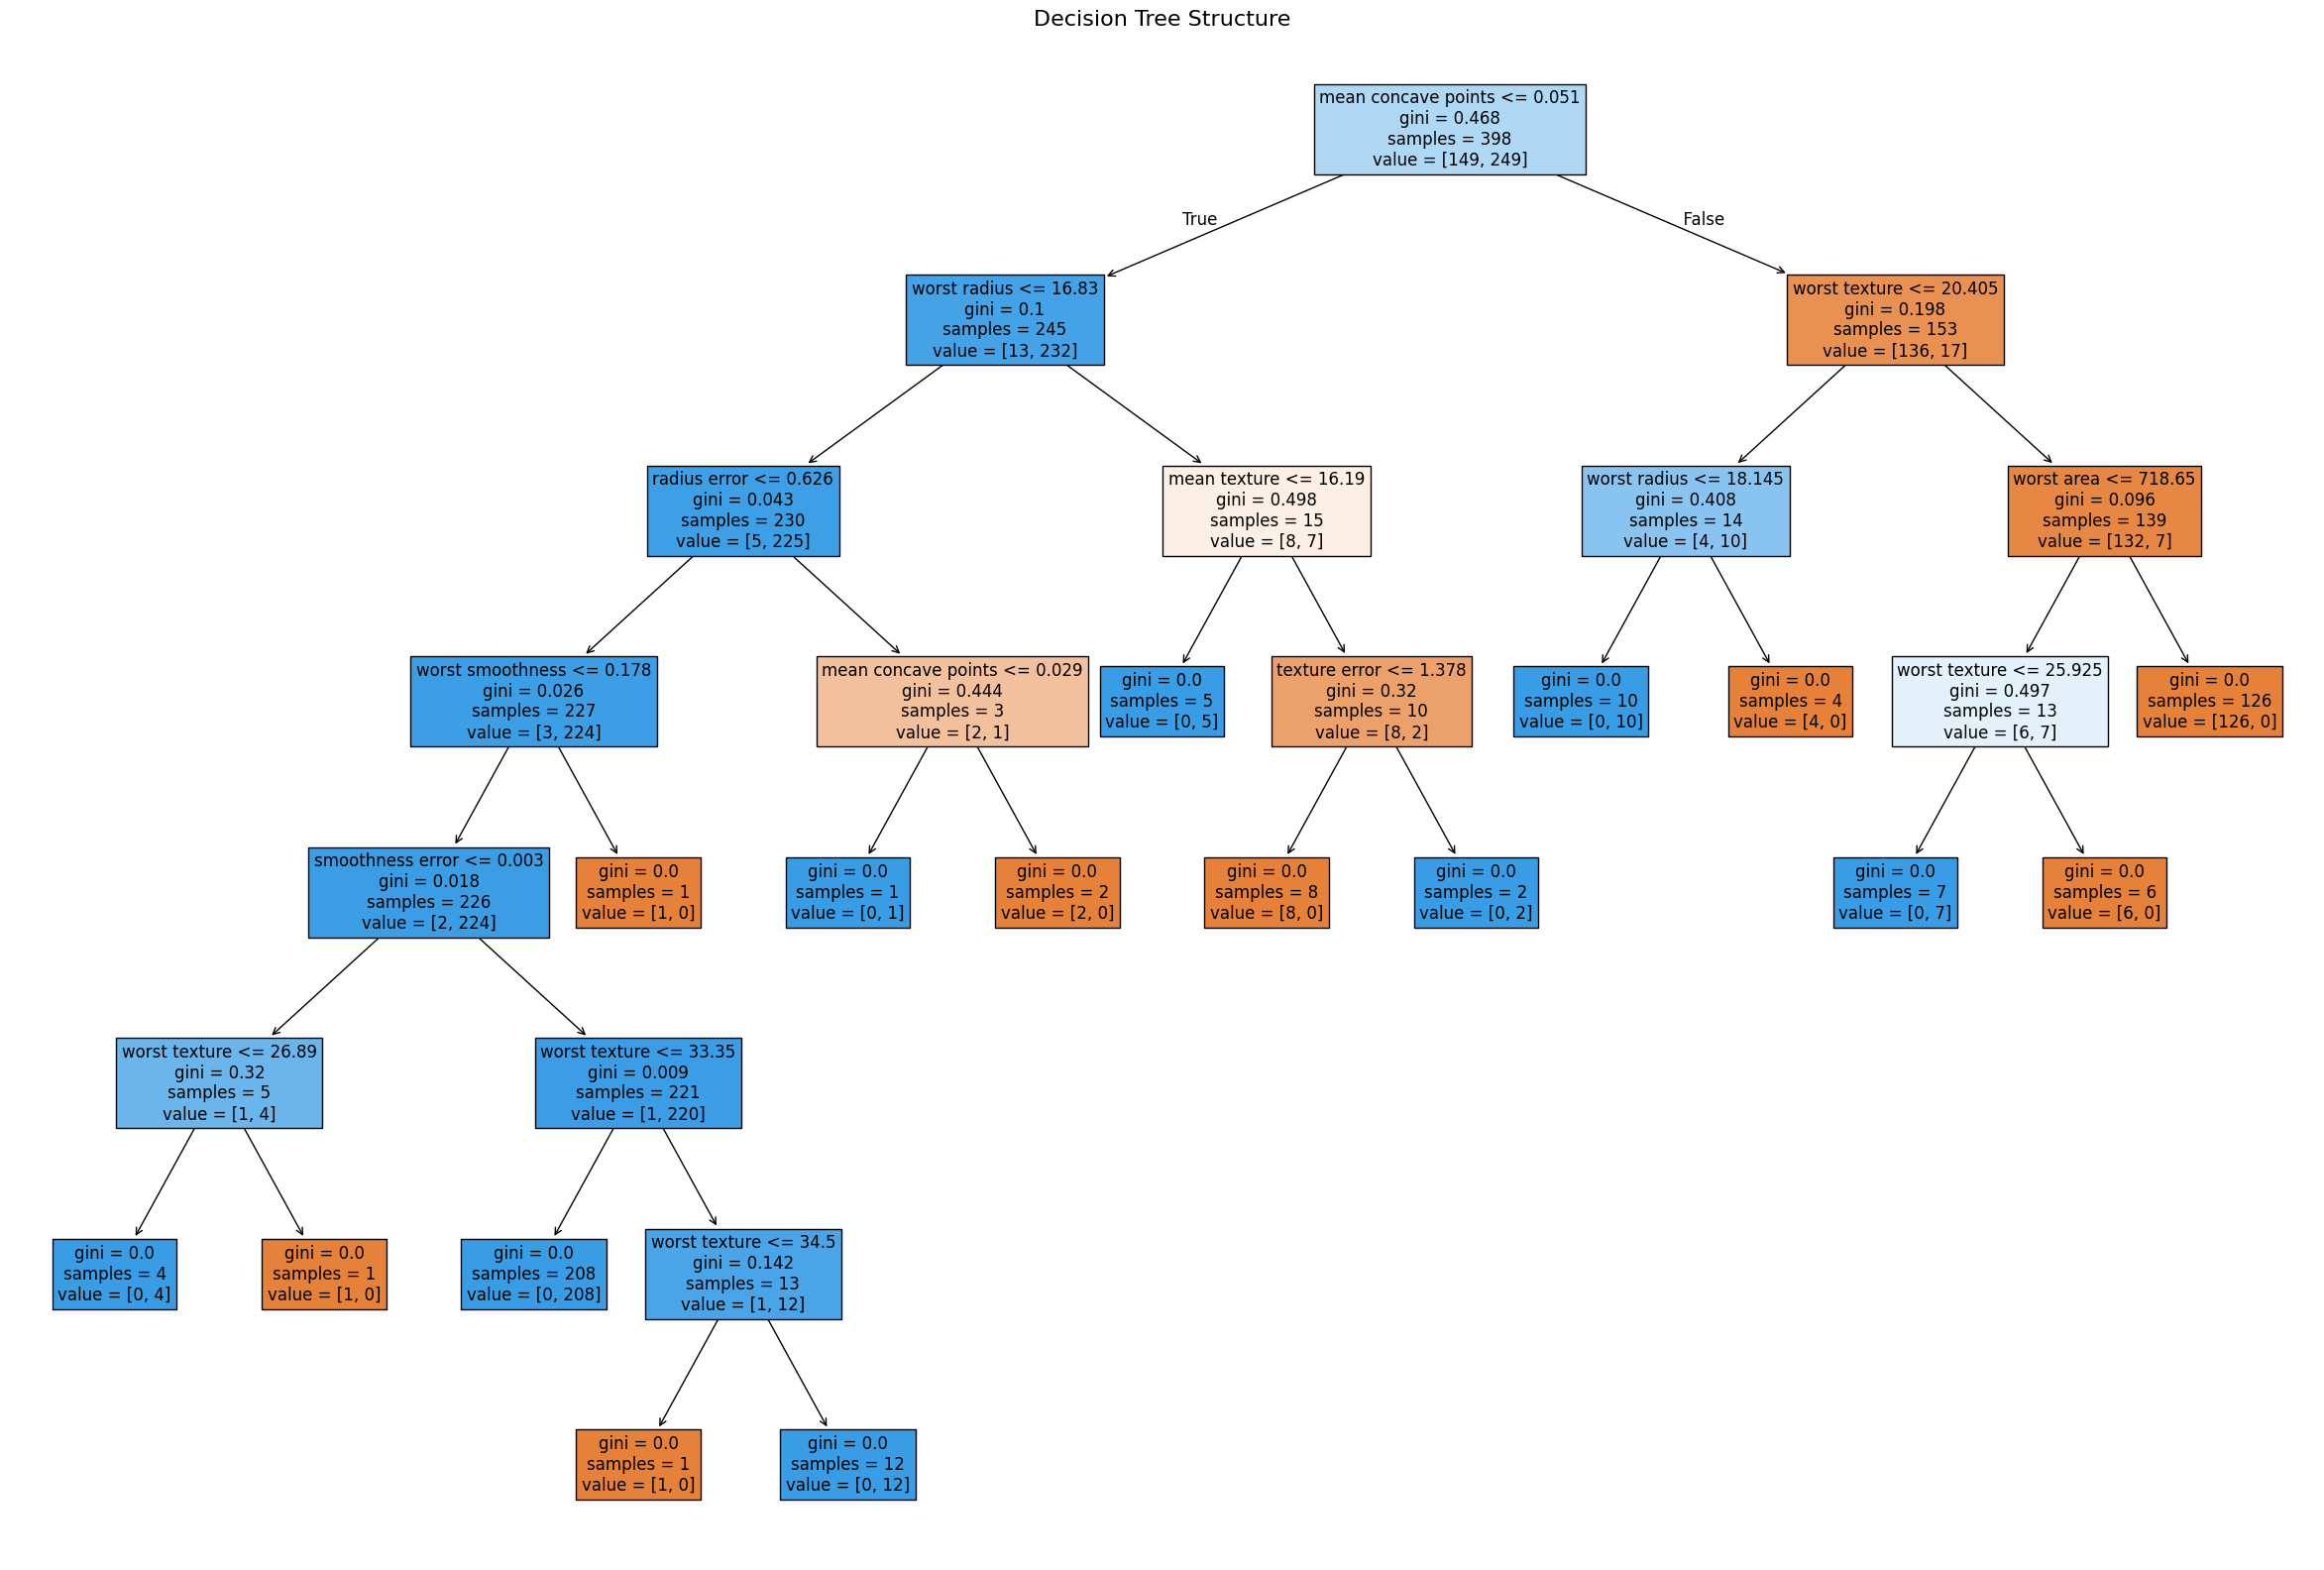

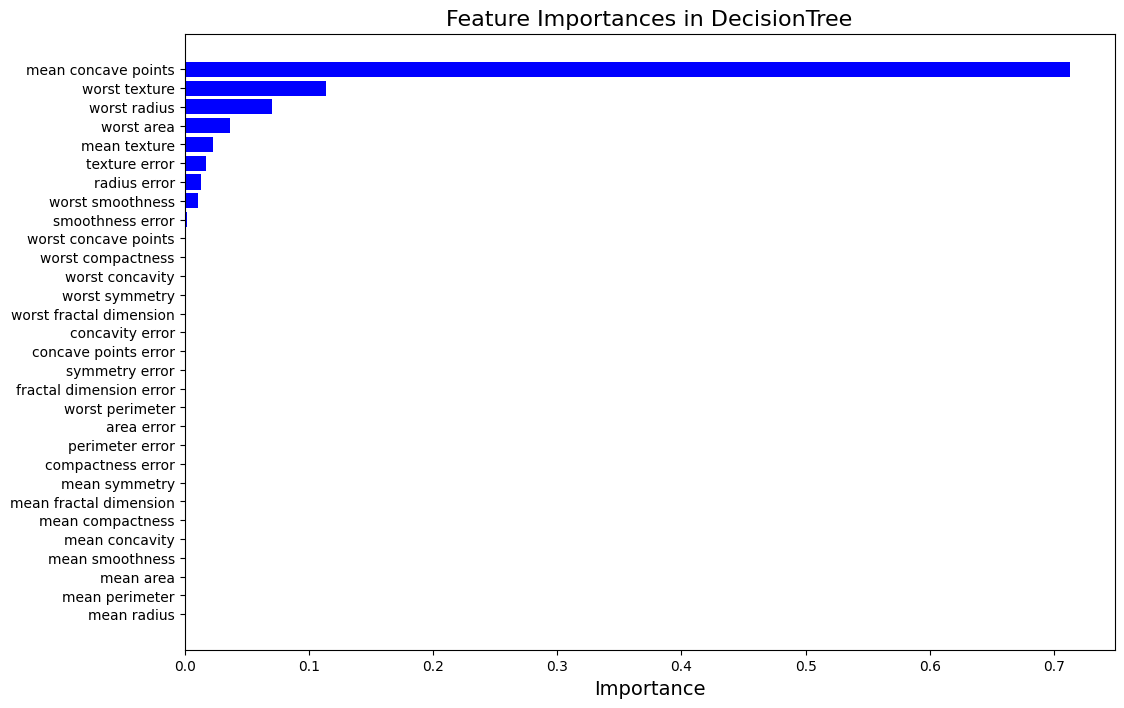

In [53]:
from sklearn.tree import plot_tree
from imodels import DecisionTreeClassifier

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Visualize the confusion matrix
print(f"DecisionTree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for DecisionTree')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(30, 20))  # Adjust the figure size here
plot_tree(decision_tree, filled=True, feature_names=feature_names, fontsize=12)  # Adjust the fontsize here
plt.title('Decision Tree Structure', fontsize=16)
plt.show()

# Visualize feature importances
plt.figure(figsize=(12, 8))
importances = decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.barh([feature_names[i] for i in indices], importances[indices], color='blue')
plt.xlabel('Importance', fontsize=14)
plt.title('Feature Importances in DecisionTree', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

### OneR Classifier

The OneR (One Rule) classifier is a simple and interpretable machine learning model that generates a single rule for classification. It works by evaluating each feature individually and selecting the one that provides the best predictive accuracy. The chosen feature is then used to create a rule that maps its values to the target classes. Despite its simplicity, OneR can often produce surprisingly effective models, making it a useful baseline for comparison with more complex algorithms. Its primary advantage lies in its interpretability, as the resulting rule is easy to understand and explain.

Accuracy of OneRClassifier: 0.89
Learned Rules:
{'col': 'X7', 'index_col': np.int64(7), 'cutoff': np.float64(0.05127999931573868), 'val': np.float64(0.1111111111111111), 'flip': True, 'val_right': np.float64(0.9469387755102041), 'num_pts': 398, 'num_pts_right': 245}
{'col': 'X7', 'index_col': np.int64(7), 'cutoff': np.float64(0.06333500146865845), 'val': np.float64(0.042735042735042736), 'flip': True, 'val_right': np.float64(0.3333333333333333), 'num_pts': 153, 'num_pts_right': 36}
{'col': 'X7', 'index_col': np.int64(7), 'cutoff': np.float64(0.08562500029802322), 'val': np.float64(0.0), 'flip': True, 'val_right': np.float64(0.12195121951219512), 'num_pts': 117, 'num_pts_right': 41}
{'val': np.float64(0.0), 'num_pts': 76}
Learned Rules:
If mean concave points > 0.05, predict class 1, else predict class 0
If mean concave points > 0.06, predict class 1, else predict class 0
If mean concave points > 0.09, predict class 1, else predict class 0


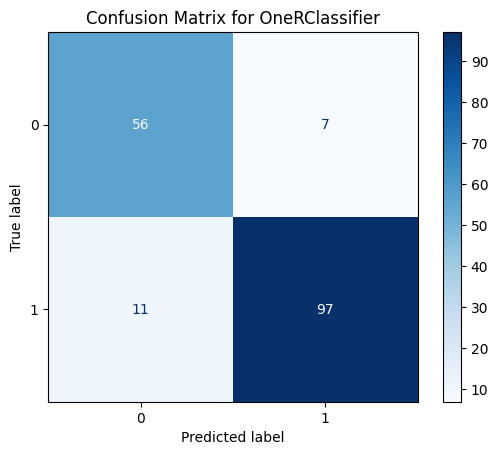

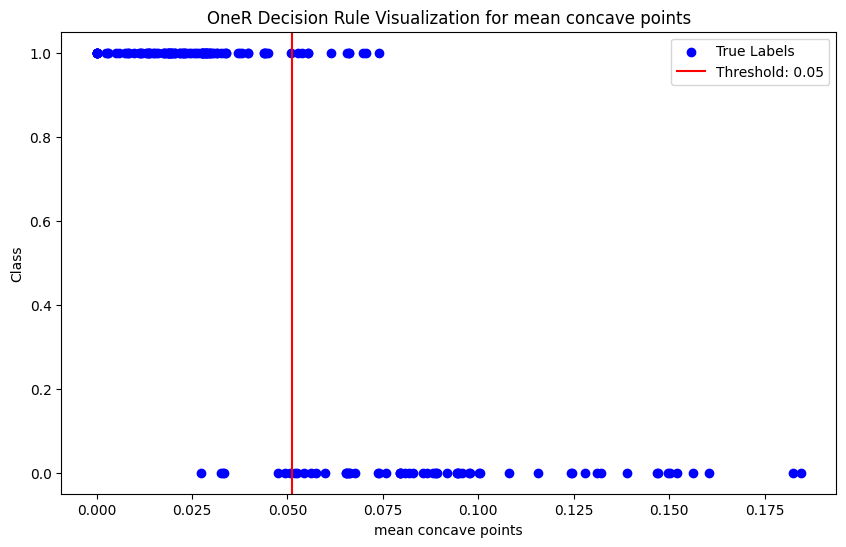

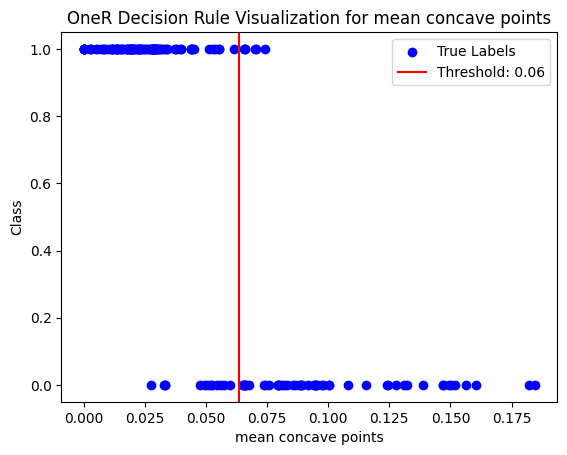

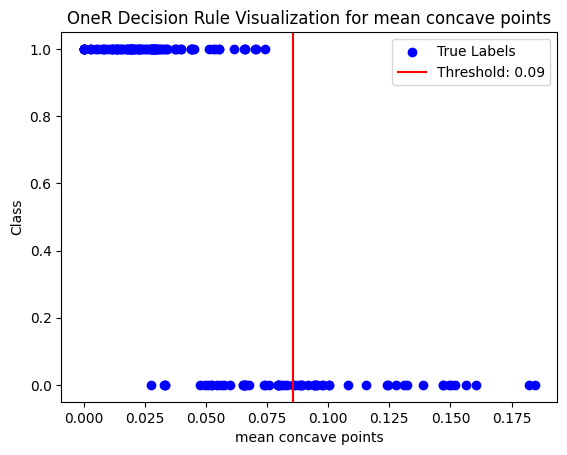

In [38]:
# Initialize the OneRClassifier
one_r_model = OneRClassifier()

# Fit the model on the training data
one_r_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = one_r_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of OneRClassifier: {accuracy:.2f}")

# View the rules
print("Learned Rules:")
for rule in one_r_model.rules_:
    print(rule)  # Print the rule to inspect its structure

# Assuming the rules are structured as a list of dictionaries with 'col' and 'cutoff' keys
print("Learned Rules:")
for rule in one_r_model.rules_:
    if 'index_col' in rule and 'cutoff' in rule:
        feature_idx = rule['index_col']
        threshold = rule['cutoff']
        rule_description = f"If {feature_names[feature_idx]} > {threshold:.2f}, predict class 1, else predict class 0"
        print(rule_description)


# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(one_r_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for OneRClassifier')
plt.show()

# Visualize the rule
plt.figure(figsize=(10, 6))
for rule in one_r_model.rules_:
    if 'index_col' in rule and 'cutoff' in rule:
        feature_idx = rule['index_col']
        threshold = rule['cutoff']
        plt.scatter(X_test[:, feature_idx], y_test, c='blue', label='True Labels')
        plt.axvline(x=threshold, color='red', label=f'Threshold: {threshold:.2f}')
        plt.xlabel(feature_names[feature_idx])
        plt.ylabel('Class')
        plt.title(f'OneR Decision Rule Visualization for {feature_names[feature_idx]}')
        plt.legend()
        plt.show()

### Conclusion

In this project, we implemented three interpretable machine learning models from the imodels library: RuleFit, Decision Tree Classifier, and OneR. We trained the models on the breast cancer dataset and evaluated their performance using accuracy and a confusion matrix. We also visualized the decision tree and the rules generated by the models to understand how they make predictions. The models achieved good performance on the dataset while providing powerful interpretability, making them useful for understanding the underlying patterns in the data while maintaining high accuracy.